# ECE239AS Project

#### Load the dataset

In [60]:
from useful.utils_rnn import *
train_loader, test_loader,val_loader = loader()(path='ALL',
                                                batch_size= 20,
                                                num_test = 100,
                                                num_validation = 100)

nan exists on row 56,and be deleted
nan exists on row 525,and be deleted
nan exists on row 572,and be deleted
nan exists on row 689,and be deleted
nan exists on row 825,and be deleted
nan exists on row 1008,and be deleted
nan exists on row 1009,and be deleted
nan exists on row 1010,and be deleted
nan exists on row 1043,and be deleted
nan exists on row 1158,and be deleted
nan exists on row 1180,and be deleted
nan exists on row 1209,and be deleted
nan exists on row 1253,and be deleted
nan exists on row 1372,and be deleted
nan exists on row 1377,and be deleted
nan exists on row 1537,and be deleted
nan exists on row 1555,and be deleted
nan exists on row 1580,and be deleted
nan exists on row 2074,and be deleted
nan exists on row 2097,and be deleted
nan exists on row 2140,and be deleted
nan exists on row 2167,and be deleted
nan exists on row 2194,and be deleted
nan exists on row 2291,and be deleted
nan exists on row 2326,and be deleted
nan exists on row 2365,and be deleted
nan exists on row 

In [45]:
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

criteria = F.cross_entropy

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target).long()
        
        # optimizer.zero_grad()
        model.zero_grad()
        
        # Dim required by LSTM (time, )
        data_t = torch.transpose(data, dim0=1, dim1=2)
        output = model(data_t)
        loss = criteria(output, target)
        loss.backward(retain_graph=True)
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data[0]))
    

def test(test_loader=test_loader, mode = 'val'):
    # train mode to get the train accuracy 
    # val mode to get the validation accuracy
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target).long()
        data_t = torch.transpose(data, dim0=1, dim1=2)
        output = model(data_t)
        test_loss += criteria(output, target, size_average=False).data[0] # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).long().cpu().sum()

    test_loss /= len(test_loader.dataset)
    if mode == 'train':
        print('train loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        

    else:
        print('\nvalidation loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    
    return [test_loss,correct / len(test_loader.dataset)]

#### LSTM model

In [46]:
class RNN_LSTM(nn.Module):
    def __init__(self, input_size=22, hidden_size=64, num_layers=2, num_classes=4):
        super(RNN_LSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Dim: batch_size, time, feature
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True,dropout = 0.7)
        self.fc = nn.Sequential(
                    nn.Linear(hidden_size, num_classes),
                    
        )
        

    def forward(self, x):

        # Forward propagate RNN
        out, _ = self.lstm(x)

        # Decode hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out

Train Epoch: 0 [0/187 (0%)]	Loss: 1.377926
Train Epoch: 0 [100/187 (50%)]	Loss: 1.377167
train loss: 1.3687, Accuracy: 57/187 (30%)

validation loss: 1.4154, Accuracy: 12/50 (24%)

Train Epoch: 1 [0/187 (0%)]	Loss: 1.402445
Train Epoch: 1 [100/187 (50%)]	Loss: 1.374724
train loss: 1.3677, Accuracy: 59/187 (32%)

validation loss: 1.3997, Accuracy: 10/50 (20%)

Train Epoch: 2 [0/187 (0%)]	Loss: 1.341282
Train Epoch: 2 [100/187 (50%)]	Loss: 1.333767
train loss: 1.3599, Accuracy: 58/187 (31%)

validation loss: 1.4178, Accuracy: 10/50 (20%)

Train Epoch: 3 [0/187 (0%)]	Loss: 1.401099
Train Epoch: 3 [100/187 (50%)]	Loss: 1.391336
train loss: 1.3517, Accuracy: 60/187 (32%)

validation loss: 1.4271, Accuracy: 10/50 (20%)

Train Epoch: 4 [0/187 (0%)]	Loss: 1.285281
Train Epoch: 4 [100/187 (50%)]	Loss: 1.445403
train loss: 1.3528, Accuracy: 66/187 (35%)

validation loss: 1.4038, Accuracy: 12/50 (24%)

Train Epoch: 5 [0/187 (0%)]	Loss: 1.309250
Train Epoch: 5 [100/187 (50%)]	Loss: 1.330883
train 

Text(0.5,1,'accuracy')

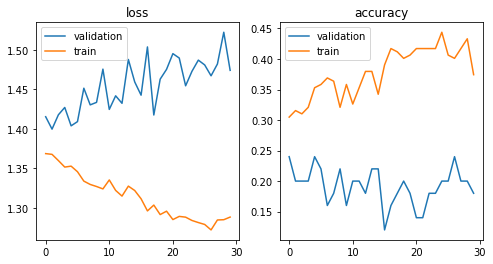

In [47]:
import torch.autograd as autograd
import matplotlib.pyplot as plt

model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
stats = {}
stats['train'] = []
stats['val']  = []

epoches = range(30)
for epoch in epoches:
    train(epoch)
    stats['train'].append(test(train_loader,mode = 'train'))
    stats['val'].append(test(test_loader,mode = 'val'))

# draw a figure for this layer
stats['val']  = np.array(stats['val'])
stats['train'] = np.array(stats['train'])

fig, ax = plt.subplots(1, 2,figsize = (8,4))
ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

ax[0].legend(['validation','train'])
ax[0].set_title('loss')

ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

ax[1].legend(['validation','train'])
ax[1].set_title('accuracy')

## tune parameters

Train Epoch: 0 [0/187 (0%)]	Loss: 1.403082
Train Epoch: 0 [100/187 (50%)]	Loss: 1.364943
train loss: 1.3692, Accuracy: 57/187 (30%)

validation loss: 1.3936, Accuracy: 11/50 (22%)

Train Epoch: 1 [0/187 (0%)]	Loss: 1.339383
Train Epoch: 1 [100/187 (50%)]	Loss: 1.375287
train loss: 1.3514, Accuracy: 64/187 (34%)

validation loss: 1.4335, Accuracy: 8/50 (16%)

Train Epoch: 2 [0/187 (0%)]	Loss: 1.341668
Train Epoch: 2 [100/187 (50%)]	Loss: 1.329013
train loss: 1.3373, Accuracy: 65/187 (35%)

validation loss: 1.4723, Accuracy: 9/50 (18%)

Train Epoch: 3 [0/187 (0%)]	Loss: 1.313292
Train Epoch: 3 [100/187 (50%)]	Loss: 1.361433
train loss: 1.3635, Accuracy: 64/187 (34%)

validation loss: 1.4198, Accuracy: 12/50 (24%)

Train Epoch: 4 [0/187 (0%)]	Loss: 1.341824
Train Epoch: 4 [100/187 (50%)]	Loss: 1.459207
train loss: 1.3140, Accuracy: 63/187 (34%)

validation loss: 1.4740, Accuracy: 11/50 (22%)

Train Epoch: 5 [0/187 (0%)]	Loss: 1.286113
Train Epoch: 5 [100/187 (50%)]	Loss: 1.289186
train lo

Text(0.5,1,'accuracy')

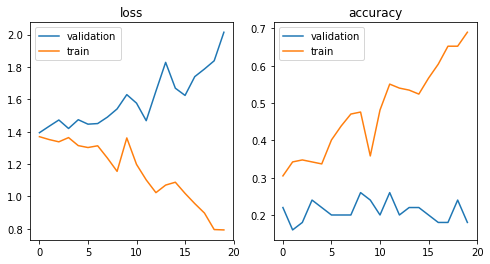

In [52]:
import torch.autograd as autograd
import matplotlib.pyplot as plt

class RNN_LSTM(nn.Module):
    def __init__(self, input_size=22, hidden_size=64, num_layers=2, num_classes=4):
        super(RNN_LSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Dim: batch_size, time, feature
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True,dropout = 0.5)
        self.fc = nn.Sequential(
                    nn.Linear(hidden_size, num_classes),
                    
        )
        

    def forward(self, x):

        # Forward propagate RNN
        out, _ = self.lstm(x)

        # Decode hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out
    


model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.9,0.999), eps=1e-08, weight_decay=0)
stats = {}
stats['train'] = []
stats['val']  = []

epoches = range(20)
for epoch in epoches:
    train(epoch)
    stats['train'].append(test(train_loader,mode = 'train'))
    stats['val'].append(test(test_loader,mode = 'val'))

# draw a figure for this layer
stats['val']  = np.array(stats['val'])
stats['train'] = np.array(stats['train'])

fig, ax = plt.subplots(1, 2,figsize = (8,4))
ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

ax[0].legend(['validation','train'])
ax[0].set_title('loss')

ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

ax[1].legend(['validation','train'])
ax[1].set_title('accuracy')

## Add Dropout layers 

Train Epoch: 0 [0/2358 (0%)]	Loss: 1.368160
Train Epoch: 0 [100/2358 (4%)]	Loss: 1.377445
Train Epoch: 0 [200/2358 (8%)]	Loss: 1.395261
Train Epoch: 0 [300/2358 (13%)]	Loss: 1.381440
Train Epoch: 0 [400/2358 (17%)]	Loss: 1.370860
Train Epoch: 0 [500/2358 (21%)]	Loss: 1.406522
Train Epoch: 0 [600/2358 (25%)]	Loss: 1.390292
Train Epoch: 0 [700/2358 (30%)]	Loss: 1.393723
Train Epoch: 0 [800/2358 (34%)]	Loss: 1.393703
Train Epoch: 0 [900/2358 (38%)]	Loss: 1.387229
Train Epoch: 0 [1000/2358 (42%)]	Loss: 1.382883
Train Epoch: 0 [1100/2358 (47%)]	Loss: 1.384346
Train Epoch: 0 [1200/2358 (51%)]	Loss: 1.391266
Train Epoch: 0 [1300/2358 (55%)]	Loss: 1.391699
Train Epoch: 0 [1400/2358 (59%)]	Loss: 1.388182
Train Epoch: 0 [1500/2358 (64%)]	Loss: 1.387986
Train Epoch: 0 [1600/2358 (68%)]	Loss: 1.382515
Train Epoch: 0 [1700/2358 (72%)]	Loss: 1.389361
Train Epoch: 0 [1800/2358 (76%)]	Loss: 1.366455
Train Epoch: 0 [1900/2358 (81%)]	Loss: 1.381726
Train Epoch: 0 [2000/2358 (85%)]	Loss: 1.377948
Train E

Train Epoch: 6 [1700/2358 (72%)]	Loss: 1.385259
Train Epoch: 6 [1800/2358 (76%)]	Loss: 1.387936
Train Epoch: 6 [1900/2358 (81%)]	Loss: 1.385233
Train Epoch: 6 [2000/2358 (85%)]	Loss: 1.388258
Train Epoch: 6 [2100/2358 (89%)]	Loss: 1.389536
Train Epoch: 6 [2200/2358 (93%)]	Loss: 1.385536
Train Epoch: 6 [2300/2358 (97%)]	Loss: 1.387379
train loss: 1.3862, Accuracy: 591/2358 (25%)

validation loss: 1.3854, Accuracy: 27/100 (27%)

Train Epoch: 7 [0/2358 (0%)]	Loss: 1.386369
Train Epoch: 7 [100/2358 (4%)]	Loss: 1.390831
Train Epoch: 7 [200/2358 (8%)]	Loss: 1.379856
Train Epoch: 7 [300/2358 (13%)]	Loss: 1.388475
Train Epoch: 7 [400/2358 (17%)]	Loss: 1.383999
Train Epoch: 7 [500/2358 (21%)]	Loss: 1.385131
Train Epoch: 7 [600/2358 (25%)]	Loss: 1.380295
Train Epoch: 7 [700/2358 (30%)]	Loss: 1.385226
Train Epoch: 7 [800/2358 (34%)]	Loss: 1.386070
Train Epoch: 7 [900/2358 (38%)]	Loss: 1.388685
Train Epoch: 7 [1000/2358 (42%)]	Loss: 1.391619
Train Epoch: 7 [1100/2358 (47%)]	Loss: 1.383301
Train Ep

Text(0.5,1,'accuracy')

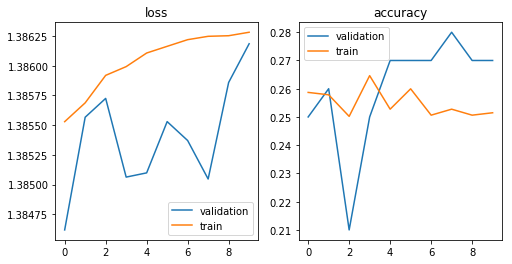

In [62]:
import torch.autograd as autograd
import matplotlib.pyplot as plt

class RNN_LSTM(nn.Module):
    def __init__(self, input_size=22, hidden_size=64, num_layers=2, num_classes=4):
        super(RNN_LSTM, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Dim: batch_size, time, feature
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True,dropout = 0.5)
        self.fc = nn.Sequential(
                    nn.Dropout(p=0.5),
                    nn.Linear(hidden_size, 4),        
        )
        

    def forward(self, x):

        # Forward propagate RNN
        out, _ = self.lstm(x)

        # Decode hidden state of last time step
        out = self.fc(out[:, -1, :])
        return out
    


model = RNN_LSTM()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, betas=(0.9,0.999), eps=1e-08, weight_decay=0.005)
stats = {}
stats['train'] = []
stats['val']  = []

epoches = range(10)
for epoch in epoches:
    train(epoch)
    stats['train'].append(test(train_loader,mode = 'train'))
    stats['val'].append(test(test_loader,mode = 'val'))

# draw a figure for this layer
stats['val']  = np.array(stats['val'])
stats['train'] = np.array(stats['train'])

fig, ax = plt.subplots(1, 2,figsize = (8,4))
ax[0].plot(epoches,stats['val'][:,0],epoches,stats['train'][:,0])

ax[0].legend(['validation','train'])
ax[0].set_title('loss')

ax[1].plot(epoches,stats['val'][:,1],epoches,stats['train'][:,1])

ax[1].legend(['validation','train'])
ax[1].set_title('accuracy')